# Problem set 3

[Aaron Zhao]

[Student Aid Repayment: Bivariate Non-Linear Relationships] 

[03/03/2024]

In [1]:
set more off
insheet using /Users/aaronzhao/Documents/GitHub/Graduate-Statistics-and-Data-Science-for-Sociology/week5/grants2015_college_affordability20200218.csv, clear

(8 vars, 581 obs)


In [2]:
ds

year          stabbr        hgroup        igrnt_low_~c
instnm        control       highdeg       sgrnt_low_~c


In [3]:
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
}

In [4]:
ds

year          stabbr        hgroupstring  igrnt_low_~c  hgrouptemp
instnm        control       highdeg       sgrnt_low_~c  hgroup


In [5]:
codebook hgroup


-------------------------------------------------------------------------------
hgroup                                                           research level
-------------------------------------------------------------------------------

                  Type: Numeric (long)
                 Label: hgroup

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/581

            Tabulation: Freq.   Numeric  Label
                           34         1  Highest
                           37         2  Very high
                           72         3  High
                          438         4  Some/None


In [6]:
codebook sgrnt_low


-------------------------------------------------------------------------------
sgrnt_low_inc                                             state grant $ per fte
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,40112.09]                  Units: 1.000e-06
         Unique values: 578                       Missing .: 0/581

                  Mean: 3590.03
             Std. dev.: 3788.36

           Percentiles:     10%       25%       50%       75%       90%
                        374.798   1255.38   2955.35   4690.81   6946.94


In [7]:
describe


Contains data
 Observations:           581                  
    Variables:            10                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
year            int     %8.0g                 
instnm          str64   %64s                  
stabbr          str2    %9s                   
control         byte    %8.0g                 
hgroupstring    str19   %19s                  
highdeg         byte    %8.0g                 
igrnt_low_inc   float   %9.0g                 institutional grant $ per fte
sgrnt_low_inc   float   %9.0g                 state grant $ per fte
hgrouptemp      long    %19.0g     hgrouptemp
                                              
hgroup          long    %9.0g      hgroup     research level
-------------------------------------------------

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)

The dependent variable, state grant aid per student, will change positively if the independent variable, the level of reserach intensiveness of a school, changes positively. In essence, there will be a positive relationship between state grant aid per student and the level of reserach intensiveness of a school. The dependent variable is measuring state grant aid per student whereas the independent variable is measuring the level of reserach intensiveness of a school. The variable category for the dependent variable will be state grant aid per student based on 10, 25, 50, 75, and 90 percentiles. The variable category for the independent variable will be research level of schools based on a scale that has 1 has the highest, 2 as very high, 3 as high, and 4 as some/none. 

    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.

I expect each hypothesizzed relationship will be linear, in particular a positive linear relationship where as the level of reserach intensiveness of a school increases the state grant aid per student will increase as well. I believe if my hypothesis does take a non-linear form, it might be a sequential dummies or splines non-linear forms. For sequential dummies, I believe the variables I am dealing with can be divided in such ways that would fit the model beautifully, where the research intensiveness of schools are categorical variables that can be divided in increments. As for splines, the relatioship may change direction or strength abruptly, where potentially at certain point of reserach intensiveness of school the increase in state grnat aid per student may incrase abruptly as a response. I do not believe my hypothesized relationship will take a nominal or logarithmic model. This is because my variables are not categorical data with completely independent categories that do not intersect (like "race" variables) nor does it make sense to gradually accelerate or decelerate in a curve. 

    C. State your explanation why (theory) you make the predictions in A. and B.
The reason behind my explanations/theories I made for predictions A and B are from an eximinatino of Doctor Eaton's journal article "The Organizational Ecology of College Affordability: Research Activity, State Grant Aid Policies, and Student Debt at U.S. Public Universities," where in less reserach intensive schools students generally have an easier time paying off their debt. As such, tying back to the concept of predetory school, we can assume that the more reserach intensive a school's reserach is, the higher the charge and subsequently the higher governmental grant aid per student, which leads to higher profits for the schools and more debt for students. As such, my hypothesis in both A and B hinges upon this analysis of Doctor Eaton's work. 

    D. Tell us the source of your data and describe its sample.
The source of data is from Doctor Eaton's data set, grants2015_college_affordability. The sample is US higher education institutions.


## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [8]:
*the state grant aid per student is the dependent variable, 
*whereas reserach intensiveness of a school is the independent variable

sum sgrnt_low hgroup


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
sgrnt_low_~c |        581    3590.033    3788.357          0   40112.09
      hgroup |        581     3.57315    .8511059          1          4


In [9]:
xtile squant = sgrnt_low, nq(5)

*I am creating a new variable here (called squant) that will consist of quantiles for state grant aid per student

*I specified that I want 5 quantiles for this variable with the option "nq(5)"

*5 quantile means that there would be these categories:
    * 1 = 0-20% percentile
    * 2 = 20-40% percentile
    * 3 = 40-60% percentile
    * 4 = 60-80% percentile
    * 5 = 80-100% percentile

*If you fall into the 10% percentile for instance, that means your value/score is higher than 10% of the sample. 
*If you fall into the 99% percentile, your value/score is higher than 99% of the sample.

//I understand in the lab session Anh is using the independent variable for this step (and below steps)
//my independent variable is not continuous so I am using the dependent variable instead for this assignment. 

In [10]:
sum sgrnt_low, detail
tab squant


                    state grant $ per fte
-------------------------------------------------------------
      Percentiles      Smallest
 1%     3.427762              0
 5%      90.0805              0
10%     374.7984              0       Obs                 581
25%     1255.379              0       Sum of wgt.         581

50%     2955.348                      Mean           3590.033
                        Largest       Std. dev.      3788.357
75%     4690.805       22854.09
90%     6946.937       32254.32       Variance       1.44e+07
95%     8991.016       33224.98       Skewness       4.088276
99%     16660.79       40112.09       Kurtosis       31.03328

5 quantiles |
         of |
  sgrnt_low |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        117       20.14       20.14
          2 |        116       19.97       40.10
          3 |        116       19.97       60.07
          4 |        116       19.97       80.03
         

In [11]:
%head hgroup sgrnt_low squant

,hgroup,sgrnt_low_inc,squant
1,Some/None,5126.689,4
2,Some/None,3182.448,3
3,High,9233.675,5
4,High,129.9652,1
5,Some/None,39.06705,1


In [12]:
sum sgrnt_low if squant==3


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
sgrnt_low_~c |        116    2937.071    303.7679   2434.128   3452.216


(bin=24, start=0, width=122.37796)
(bin=24, start=0, width=1548.9591)


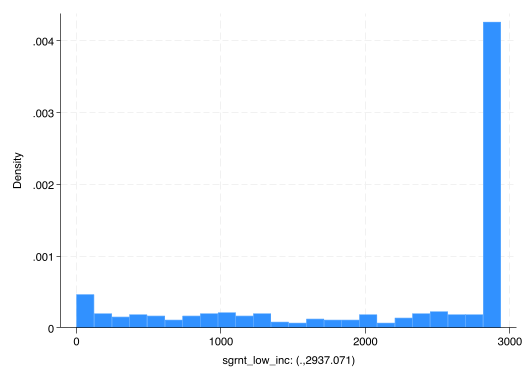

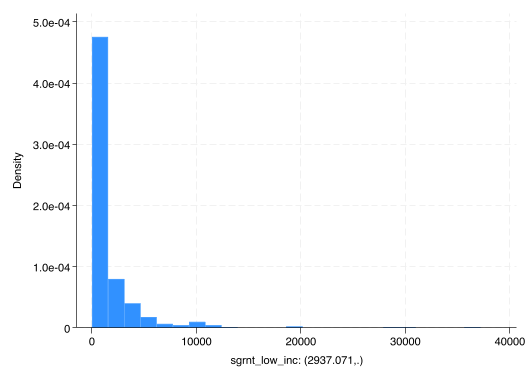

In [13]:
mkspline sgrnt1 2937.071 sgrnt2 = sgrnt_low

histogram sgrnt1, name(hist1)
histogram sgrnt2, name(hist2)


      Source |       SS           df       MS      Number of obs   =       581
-------------+----------------------------------   F(2, 578)       =     27.06
       Model |  35.9713938         2  17.9856969   Prob > F        =    0.0000
    Residual |  384.169742       578  .664653533   R-squared       =    0.0856
-------------+----------------------------------   Adj R-squared   =    0.0825
       Total |  420.141136       580  .724381269   Root MSE        =    .81526

------------------------------------------------------------------------------
      hgroup | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      sgrnt1 |   .0000472   .0000348     1.36   0.176    -.0000212    .0001156
      sgrnt2 |  -.0000787   .0000108    -7.27   0.000    -.0000999   -.0000574
       _cons |   3.585221   .0787374    45.53   0.000     3.430575    3.739867
--------------------------------------------------

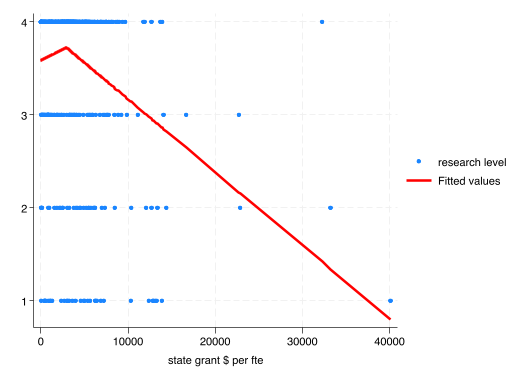

In [14]:
*Run the regression output for this spline model and examine the graph for it

reg hgroup sgrnt1 sgrnt2
predict yhat

*Graph the fited spline lines for college net price
tw (scatter hgroup sgrnt_low) (line yhat sgrnt_low, sort color(red) lwidth(thick))

Concluding interpretation:
This result looks like something out of lovecraftian mathematical horror. It is uninterpretable (which is to be expected as the dependent variable I am using is not a continuous variable). But if we really have to dissect this graph, I would argue that there definitly is a knot near the begining of the graph, where the fitted values took a sharp turn down. If the variables I have choosen are all continuous, the graph may be a lot better and more legible. 

Creating spline (2):

In [15]:
mkspline sgrnt3 = sgrnt_low, cubic displayknots

*Stata calculates the potential knots for us (5 knots are created as default for cubic spline functions).


             |     knot1      knot2      knot3      knot4      knot5 
-------------+-------------------------------------------------------
sgrnt_low_~c |  84.61274   1416.656   2955.348   4372.813   9209.409 


In [16]:
regress hgroup sgrnt3*


      Source |       SS           df       MS      Number of obs   =       581
-------------+----------------------------------   F(4, 576)       =     15.18
       Model |  40.0570114         4  10.0142528   Prob > F        =    0.0000
    Residual |  380.084125       576  .659868272   R-squared       =    0.0953
-------------+----------------------------------   Adj R-squared   =    0.0891
       Total |  420.141136       580  .724381269   Root MSE        =    .81232

------------------------------------------------------------------------------
      hgroup | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     sgrnt31 |   1.58e-07   .0001404     0.00   0.999    -.0002757     .000276
     sgrnt32 |   .0016571   .0019317     0.86   0.391    -.0021369    .0054511
     sgrnt33 |  -.0059277   .0046552    -1.27   0.203    -.0150709    .0032156
     sgrnt34 |   .0079168    .004125     1.92   0.

In [17]:
predict yhat2

(option xb assumed; fitted values)


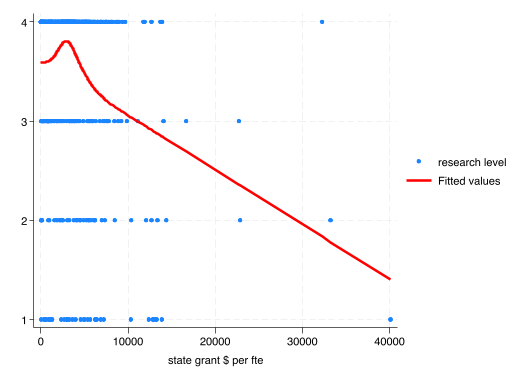

In [18]:
tw (scatter hgroup sgrnt_low) (line yhat2 sgrnt_low, sort color(red) lwidth(thick))

Concluding interpretation:
A spline, both linear and cubic, is inappropriate for modeling the relationship between reserach level of schools and the state grant aid per student. In addition, we also have a low R-squared for the cubic spline model. I presume part of the reason for this scenario can be attributed to the fact that my independent variable, the reserach level of schools, is not a continuous variable and thus can not be approperiatly be applied into the spline model.

Turning continuous independent variable into sequential dummies:

In [19]:
describe sgrnt_low


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
sgrnt_low_inc   float   %9.0g                 state grant $ per fte


In [20]:
codebook sgrnt_low


-------------------------------------------------------------------------------
sgrnt_low_inc                                             state grant $ per fte
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,40112.09]                  Units: 1.000e-06
         Unique values: 578                       Missing .: 0/581

                  Mean: 3590.03
             Std. dev.: 3788.36

           Percentiles:     10%       25%       50%       75%       90%
                        374.798   1255.38   2955.35   4690.81   6946.94


In [21]:
sum sgrnt_low, detail


                    state grant $ per fte
-------------------------------------------------------------
      Percentiles      Smallest
 1%     3.427762              0
 5%      90.0805              0
10%     374.7984              0       Obs                 581
25%     1255.379              0       Sum of wgt.         581

50%     2955.348                      Mean           3590.033
                        Largest       Std. dev.      3788.357
75%     4690.805       22854.09
90%     6946.937       32254.32       Variance       1.44e+07
95%     8991.016       33224.98       Skewness       4.088276
99%     16660.79       40112.09       Kurtosis       31.03328


In [22]:
egen netaid_vibes = cut(sgrnt_low), at(300,1000,1700,2400,3100,3800,4500,5200,5900,6600,7300)

(104 missing values generated)


In [23]:
tab netaid_vibes


netaid_vibe |
          s |      Freq.     Percent        Cum.
------------+-----------------------------------
        300 |         69       14.47       14.47
       1000 |         57       11.95       26.42
       1700 |         51       10.69       37.11
       2400 |         79       16.56       53.67
       3100 |         77       16.14       69.81
       3800 |         43        9.01       78.83
       4500 |         37        7.76       86.58
       5200 |         31        6.50       93.08
       5900 |         20        4.19       97.27
       6600 |         13        2.73      100.00
------------+-----------------------------------
      Total |        477      100.00


In [24]:
reg hgroup i.netaid_vibes


      Source |       SS           df       MS      Number of obs   =       477
-------------+----------------------------------   F(9, 467)       =      2.51
       Model |  14.2846067         9  1.58717852   Prob > F        =    0.0081
    Residual |  295.036148       467  .631769054   R-squared       =    0.0462
-------------+----------------------------------   Adj R-squared   =    0.0278
       Total |  309.320755       476  .649833518   Root MSE        =    .79484

------------------------------------------------------------------------------
      hgroup | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
netaid_vibes |
       1000  |   .2090008   .1422664     1.47   0.142    -.0705609    .4885624
       1700  |   .2131287   .1467777     1.45   0.147    -.0752978    .5015553
       2400  |   .2793983     .13097     2.13   0.033     .0220347    .5367618
       3100  |   .2864672   .131760


Variables that uniquely identify margins: netaid_vibes


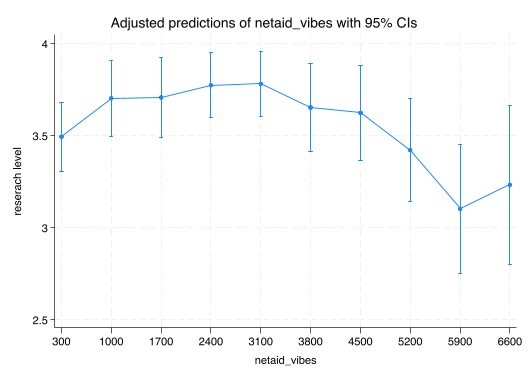

In [25]:
qui margins i.netaid_vibes, atmeans
marginsplot, ytitle(reserach level)

In [26]:
codebook hgroup


-------------------------------------------------------------------------------
hgroup                                                           research level
-------------------------------------------------------------------------------

                  Type: Numeric (long)
                 Label: hgroup

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/581

            Tabulation: Freq.   Numeric  Label
                           34         1  Highest
                           37         2  Very high
                           72         3  High
                          438         4  Some/None


Concluding interpretation:
I would interpret this by focusing on the means of each bracket. At the 0-300 bracket for state grant aid per student, the average reserach level of schools are about 3.5, which is below "High". Moving from this to the 300-1000 bracket, we see a decrease in research level of schools to about 3.7, which is still below "High" but not to the point of reaching 4, or "some/None". Moving to 1-1700 there is no change, but moving from 1700-2400 we see a further decrease in reserach level to about 3.8. Moving to 24-3100, there is no visiable change, but from 31-3800 there is an increase in reserach level of schools back to around 3.7. Moving to 38-4500 we see a further increase in reserach level of schools from 3.7 to around 3.6. Moving from 45-5200 we see a further increase in research level of schools where it changed from 3.6 to around 3.4. Moving from 52-5900, there is a further increase in reserach level where it changed from 3.4 to about 3.2. Lastly, from 59-6600, there is actually a decrease in reserach level from 3.2 to around 3.3.


In [27]:
eststo clear
eststo: reg hgroup sgrnt_low
eststo: reg hgroup sgrnt_low sgrnt2
predict yhatquad


      Source |       SS           df       MS      Number of obs   =       581
-------------+----------------------------------   F(1, 579)       =     43.42
       Model |  29.3060444         1  29.3060444   Prob > F        =    0.0000
    Residual |  390.835092       579  .675017429   R-squared       =    0.0698
-------------+----------------------------------   Adj R-squared   =    0.0681
       Total |  420.141136       580  .724381269   Root MSE        =    .82159

------------------------------------------------------------------------------
      hgroup | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
sgrnt_low_~c |  -.0000593   9.01e-06    -6.59   0.000     -.000077   -.0000416
       _cons |   3.786166   .0469785    80.59   0.000     3.693897    3.878435
------------------------------------------------------------------------------
(est1 stored)

      Source |       SS           d

In [28]:
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase


--------------------------------------------
                      (1)             (2)   
                   hgroup          hgroup   
                     b/se            b/se   
--------------------------------------------
sgrnt_low_~c       -0.000***        0.000   
                  (0.000)         (0.000)   
sgrnt2                             -0.000** 
                                  (0.000)   
_cons               3.786***        3.585***
                  (0.047)         (0.079)   
--------------------------------------------
R-Sqaured           0.070           0.086   
N                 581.000         581.000   
--------------------------------------------


## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
    B. Say whether a linear or particular non-linear model best describes your data and why

A. The results does appear to support my hypothesis. Based on the two statistical tests I have conducted (however flawed with one variable being not continuous) it is apparent that in general as the reserach level of a school increases from 4 to 1, so too does the state grant aid per student. Both tests produced graphs that shows a noticiable trend where as the level of reserach of a school increases, so too does the state grant aid per student increases.

B. A linear model will probably best describes my data. As the trend is, in general, pretty linear with no real reason to suspect nor in need of a non-linear model to accommodate. There are also no theoretical reasoning behind why one would expect a non-linear model will be appropriate for this relationship between reserach level of schools and the state grant aid per student. 